In [47]:
import numpy as np

np.random.seed(43)
import matplotlib.pyplot as plt
import tensorflow as tf
#import creates_clsfmodel
import discriminant_methods as dm
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

import pickle

#from creates_rctmodel import *

#from creates_clsfmodel import *
from prepdata.preparing_data import *
from models import *

from sklearn.model_selection import StratifiedKFold

In [48]:
wheretolook = 'mnist' # rawdata for rings, mnist for MNIST, electron for electrons jets 

# defines the preset for the model

if wheretolook == 'mnist':
    inputdim=784
else:
    inputdim=100    
    
layers_shape = [512, 256]
lr_num = 0.0002
autoencoder_epochs = [600, 300, 300, 150, 150]

# defines the data
# Leblon et 4 eta 0
iet= 4 
ieta= 0 

if wheretolook == 'mnist':
    DATA_PATH = False

In [69]:
cv = StratifiedKFold(n_splits=10, random_state=512, shuffle=True)

#  splits the data
train_x, test_x , train_y, test_y = training_splits(DATA_PATH, cv, procedure=wheretolook)

one_class_train = True

if one_class_train:
    train_y[train_y != 2] = -1
    train_y[train_y == 2] = 1
    
    test_y[test_y != 2] = -1
    test_y[test_y == 2] = 1


In [61]:
cv = StratifiedKFold(n_splits=10, random_state=512, shuffle=True)

#  splits the data
train_x, test_x , train_y, test_y = training_splits(DATA_PATH, cv, procedure=wheretolook)

one_class_train = True

if one_class_train:
    train_y[train_y != 2] = 0
    train_y[train_y == 2] = 1
    
    test_y[test_y != 2] = 0
    test_y[test_y == 2] = 1


In [70]:
np.unique(train_y)

array([  1, 255], dtype=uint8)

In [60]:
np.unique(test_y)

array([0, 1], dtype=uint8)

In [26]:
models = DiscriminativeAutoEncoder(layers=layers_shape,classes_num=2,file_path='./spits/mnist_one_class')

Input dimension - 256
Input dimension - 784
Creating layer with 512
Creating layer previous with 256
Creating layer with 512
Input dimension - 784
[Errno 17] File exists: './spits/mnist_one_class'


In [27]:
np.unique(test_y)

array([0, 1], dtype=uint8)

In [31]:
from keras.utils.np_utils import to_categorical
if not one_class_train:
    train_targets = to_categorical(train_y)
    test_targets = to_categorical(test_y)
else:
    train_targets = train_y
    test_targets = test_y

In [32]:
test_targets

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [33]:
models.compile()
models.fit(train_x, train_y, validation_data=(test_x, test_y))

DiscriminateAutoEncoder.compile Function
DiscriminateAutoEncoder.fit Function
DiscriminateAutoEncoder.compile Function
=========== Reconstruction Model Fit ===========
Epoch 1/600
469/469 - 2s - loss: 0.0206 - mean_squared_percentage_error: 0.0206
Epoch 2/600
469/469 - 2s - loss: 0.0113 - mean_squared_percentage_error: 0.0113
Epoch 3/600
469/469 - 2s - loss: 0.0102 - mean_squared_percentage_error: 0.0102
Epoch 4/600
469/469 - 2s - loss: 0.0097 - mean_squared_percentage_error: 0.0097
Epoch 5/600
469/469 - 2s - loss: 0.0094 - mean_squared_percentage_error: 0.0094
Epoch 6/600
469/469 - 2s - loss: 0.0092 - mean_squared_percentage_error: 0.0092
Epoch 7/600
469/469 - 2s - loss: 0.0090 - mean_squared_percentage_error: 0.0090
Epoch 8/600
469/469 - 2s - loss: 0.0090 - mean_squared_percentage_error: 0.0090
Epoch 9/600
469/469 - 2s - loss: 0.0089 - mean_squared_percentage_error: 0.0089
Epoch 10/600
469/469 - 2s - loss: 0.0088 - mean_squared_percentage_error: 0.0088
Epoch 11/600
469/469 - 2s - los

In [34]:
models.save()

DiscriminateAutoEncoder.save Function


0

In [63]:
loadmodels = DiscriminativeAutoEncoder(layers=layers_shape,classes_num=10, file_path='./spits/mnist_one_class')

Input dimension - 256
Input dimension - 784
Creating layer with 512
Creating layer previous with 256
Creating layer with 512
Input dimension - 784
[Errno 17] File exists: './spits/mnist_one_class'
[Errno 17] File exists: './spits/mnist_one_class/pickle/'
[Errno 17] File exists: './spits/mnist_one_class/saved_models/'


In [64]:
loadmodels.is_trained

False

In [65]:
loadmodels.load()

DiscriminateAutoEncoder.load Function


0

In [66]:
model_output = loadmodels.predict(train_x)
predicted_class = np.argmax(model_output, axis=1)

DiscriminateAutoEncoder.predict Function


In [67]:
np.min(model_output)

5.635094e-18

In [68]:
from sklearn.metrics import classification_report
print(classification_report(train_y, predicted_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     54042
           1       0.95      0.94      0.94      5958

    accuracy                           0.99     60000
   macro avg       0.97      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



In [44]:
model_output = loadmodels.predict(test_x)
predicted_class = np.argmax(model_output, axis=1)

DiscriminateAutoEncoder.predict Function


In [45]:
np.unique(model_output)

array([1.1697998e-17, 2.1921117e-17, 2.8209185e-17, ..., 9.9999976e-01,
       9.9999988e-01, 1.0000000e+00], dtype=float32)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predicted_class))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.94      0.96      1032
           3       0.94      0.97      0.96      1010
           4       0.98      0.94      0.96       982
           5       0.95      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.93      0.94      0.94       974
           9       0.92      0.96      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



classifier 0 accuracy : [0.8621166944503784, 0.9090499877929688, 0.9138833284378052, 0.9167500138282776, 0.9184166789054871, 0.9199000000953674, 0.9204166531562805, 0.9220166802406311, 0.9210333228111267, 0.9229999780654907, 0.9220499992370605, 0.9225166440010071, 0.9227166771888733, 0.9226333498954773, 0.9227833151817322, 0.923383355140686, 0.9230499863624573]
classifier 0 loss : [0.020188968628644943, 0.011047061532735825, 0.009950324892997742, 0.009476647712290287, 0.009203839115798473, 0.00904719065874815, 0.008898862637579441, 0.008764596655964851, 0.008662251755595207, 0.008564803749322891, 0.008478714153170586, 0.008423760533332825, 0.008340387605130672, 0.008264847099781036, 0.008184795267879963, 0.008143150247633457, 0.008072576485574245, 0.008048471063375473, 0.007969079539179802, 0.00792167242616415, 0.007882732897996902, 0.007827487774193287, 0.0077836415730416775, 0.007710644975304604, 0.007675557397305965, 0.007639657240360975, 0.007595987990498543, 0.007540784776210785, 

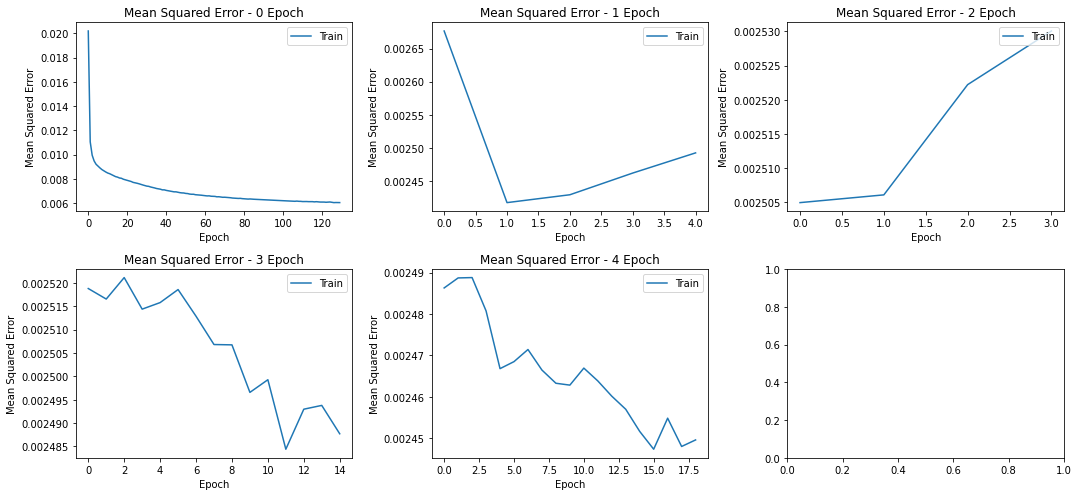

In [18]:
picklespath = './spits/mnist/pickle/'

# Define the number of columns and rows for the grid
num_columns = 3  # You can adjust this based on your preference
num_rows = 2     # You may need to adjust this based on the number of columns

# Create a figure and an array of subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 7))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for idx in range(len(os.listdir(picklespath))):
    row = idx // num_columns
    col = idx % num_columns
    with open(f'%s/modelhists_{idx}.pickle'%(picklespath), 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        [rec_hist, clf_hist] = u.load()
        accuracy = clf_hist['accuracy']
        print(f'classifier {idx} accuracy : {accuracy}')
        
        loss = rec_hist['loss']
        print(f'classifier {idx} loss : {loss}')
        axs[row,col].plot(rec_hist['loss'], label='Train')
        #plt.plot(rec_hist['val_loss'], label='Test')
        axs[row,col].set_title(f'Mean Squared Error - {idx} Epoch')
        axs[row,col].set_xlabel('Epoch')
        axs[row,col].set_ylabel('Mean Squared Error')
        axs[row, col].legend(loc='upper right')
        plt.savefig(f'rctmse{idx}.png')

        
plt.tight_layout()
plt.savefig(f'rctmse{idx}.png')
plt.show()        

classifier 0 accuracy : [0.8621166944503784, 0.9090499877929688, 0.9138833284378052, 0.9167500138282776, 0.9184166789054871, 0.9199000000953674, 0.9204166531562805, 0.9220166802406311, 0.9210333228111267, 0.9229999780654907, 0.9220499992370605, 0.9225166440010071, 0.9227166771888733, 0.9226333498954773, 0.9227833151817322, 0.923383355140686, 0.9230499863624573]
classifier 1 accuracy : [0.9476333260536194, 0.9498000144958496, 0.9498000144958496, 0.9506666660308838, 0.951033353805542, 0.9512166380882263, 0.9509000182151794, 0.9518499970436096, 0.9517666697502136, 0.951616644859314, 0.9514999985694885, 0.9528666734695435, 0.9514666795730591, 0.9521333575248718]
classifier 2 accuracy : [0.9526833295822144, 0.9547333121299744, 0.9550333619117737, 0.9549166560173035, 0.9554833173751831, 0.9550833106040955, 0.9553333520889282, 0.9556999802589417, 0.955299973487854, 0.9555333256721497, 0.9552500247955322, 0.9559500217437744, 0.9557833075523376]
classifier 3 accuracy : [0.9592000246047974, 0.96

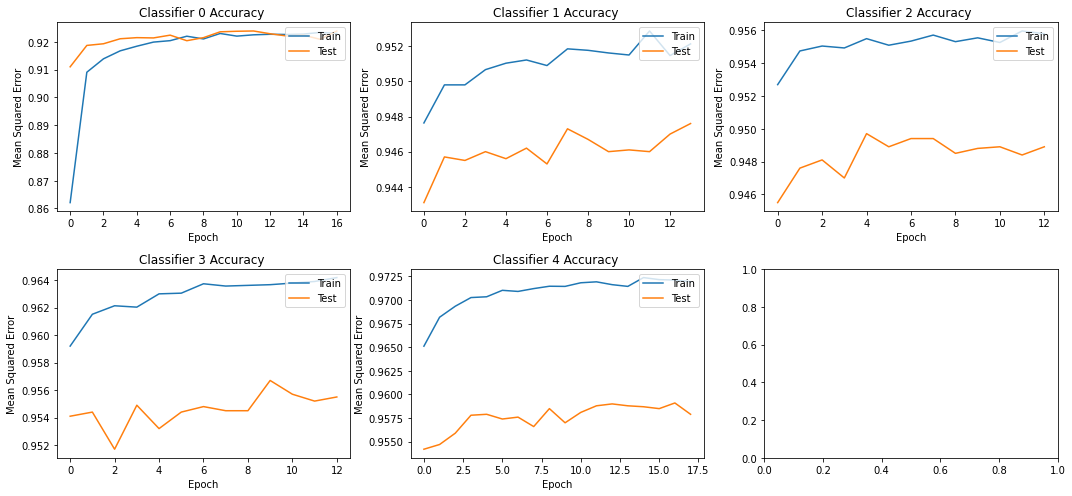

In [19]:
picklespath = './spits/mnist/pickle/'

# Define the number of columns and rows for the grid
num_columns = 3  # You can adjust this based on your preference
num_rows = 2     # You may need to adjust this based on the number of columns

# Create a figure and an array of subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 7))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for idx in range(len(os.listdir(picklespath))):
    row = idx // num_columns
    col = idx % num_columns
    with open(f'%smodelhists_{idx}.pickle'%(picklespath), 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        [rec_hist, clf_hist] = u.load()
        accuracy = clf_hist['accuracy']
        print(f'classifier {idx} accuracy : {accuracy}')
        
        axs[row,col].plot(clf_hist['accuracy'], label='Train')
        axs[row,col].plot(clf_hist['val_accuracy'], label='Test')
        axs[row, col].set_title(f'Classifier {idx} Accuracy ')
        axs[row, col].set_xlabel('Epoch')
        axs[row, col].set_ylabel('Mean Squared Error')
        axs[row, col].legend(loc='upper right')

        
#         loss = clf_hist['loss']
#         print(f'classifier {idx} loss : {loss}')
#         axs[row,col].plot(clf_hist['loss'], label='Train')
#         axs[row,col].plot(clf_hist['val_loss'], label='Test')
#         axs[row,col].set_title(f'Mean Squared Error {idx}')
#         axs[row,col].set_xlabel('Epoch')
#         axs[row,col].set_ylabel('Mean Squared Error')
#         axs[row, col].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [72]:
from matplotlib import cm
jet_cm = cm.get_cmap('jet', 10)
colors = jet_cm(np.arange(0,1,0.1))
print(colors)

[[0.         0.         0.5        1.        ]
 [0.         0.         1.         1.        ]
 [0.         0.38888889 1.         1.        ]
 [0.         0.83333333 1.         1.        ]
 [0.3046595  1.         0.66308244 1.        ]
 [0.66308244 1.         0.3046595  1.        ]
 [1.         0.90123457 0.         1.        ]
 [1.         0.48971193 0.         1.        ]
 [1.         0.0781893  0.         1.        ]
 [0.5        0.         0.         1.        ]]


row: 0, col: 0
row: 0, col: 1
row: 0, col: 2
row: 0, col: 3
row: 0, col: 4
row: 1, col: 0
row: 1, col: 1
row: 1, col: 2
row: 1, col: 3
row: 1, col: 4
row: 2, col: 0
row: 2, col: 1
row: 2, col: 2
row: 2, col: 3
row: 2, col: 4
row: 3, col: 0
row: 3, col: 1
row: 3, col: 2
row: 3, col: 3
row: 3, col: 4
row: 4, col: 0
row: 4, col: 1
row: 4, col: 2
row: 4, col: 3
row: 4, col: 4
row: 5, col: 0
row: 5, col: 1
row: 5, col: 2
row: 5, col: 3
row: 5, col: 4


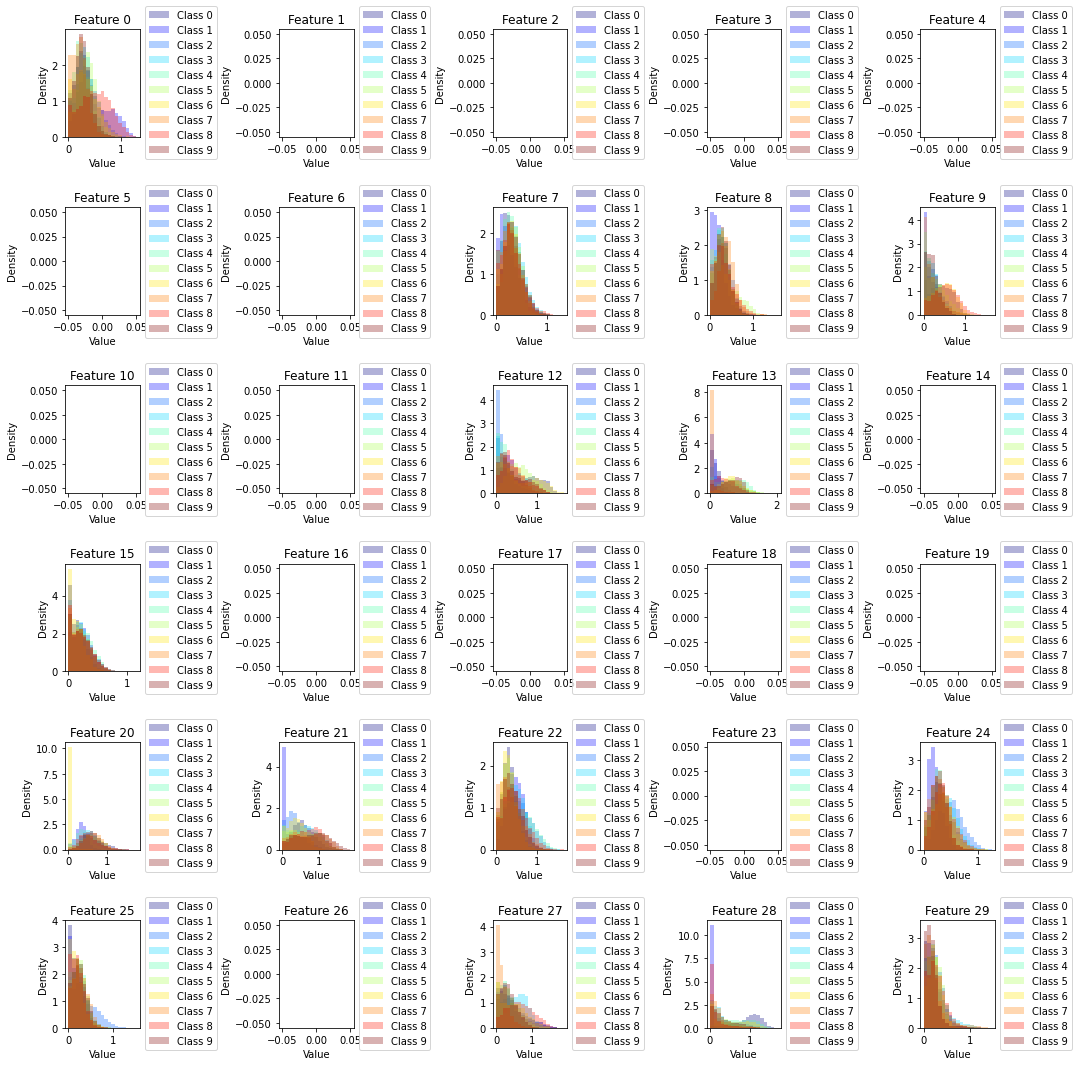

In [47]:
# Define the number of columns and rows for the grid
num_columns = 5  # You can adjust this based on your preference
num_rows = 6     # You may need to adjust this based on the number of columns

# Create a figure and an array of subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for ifeature in range(0,30):
    feature = loadmodels.model_ecd.predict(train_x)[:,ifeature]
    row = ifeature // num_columns
    col = ifeature % num_columns
    print('row: %i, col: %i'%(row, col))
    
    m_max = np.max(feature)
    m_min = np.min(feature)
    
    bins = np.linspace(m_min, m_max, 20)
    
    for iclass in range(10):
        axs[row, col].hist(feature[train_y==iclass], bins=bins, 
                           fc=colors[iclass], density=True, alpha=0.3,
                           label='Class %i'%(iclass)
                          )

    axs[row, col].set_title(f'Feature {ifeature}')
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('Density')
    axs[row, col].legend(loc='center left',bbox_to_anchor=(1, 0.5))
    


# Show the plot
plt.tight_layout()

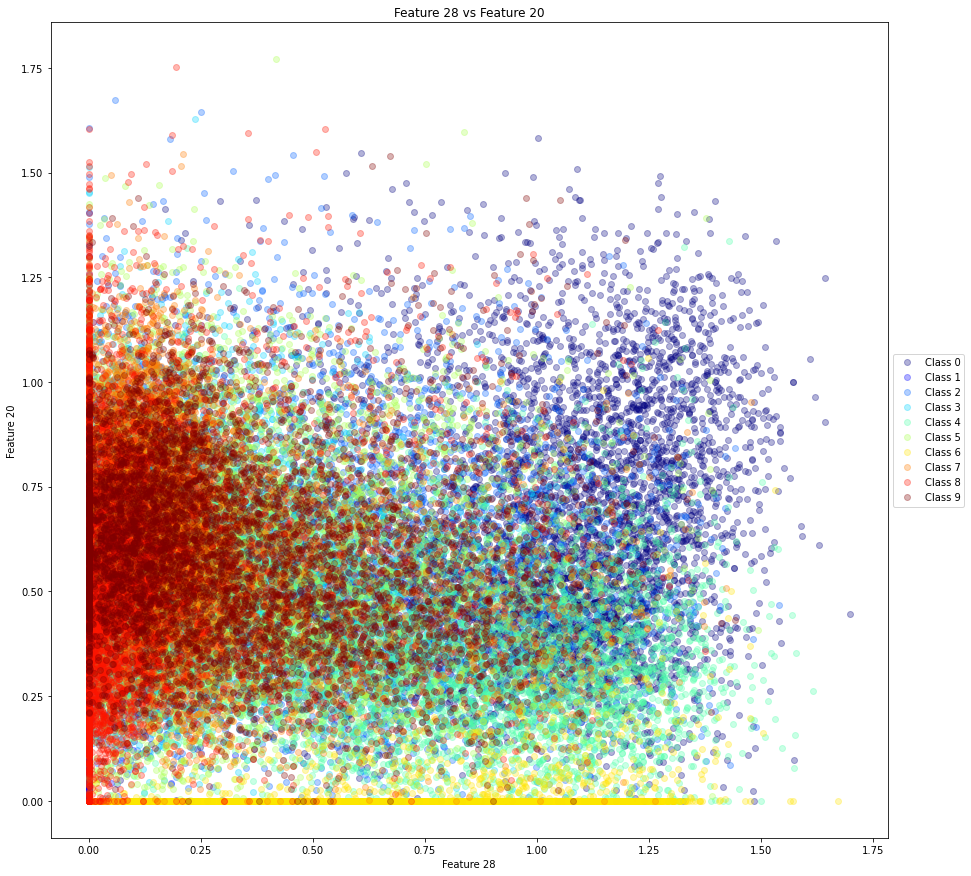

In [63]:
# Create a figure and an array of subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

feature = loadmodels.model_ecd.predict(train_x)

x_feature = 28
y_feature = 20

for iclass in range(10):
    axs.plot(feature[train_y==iclass,x_feature],
             feature[train_y==iclass,y_feature],
             'o',
             color=colors[iclass], alpha=0.3,
             label='Class %i'%(iclass)
            )
axs.set_title(f'Feature {x_feature} vs Feature {y_feature}')
axs.set_xlabel(f'Feature {x_feature}')
axs.set_ylabel(f'Feature {y_feature}')
axs.legend(loc='center left',bbox_to_anchor=(1, 0.5))

DiscriminateAutoEncoder.predict Function


In [66]:
output.shape

(60000, 10)

DiscriminateAutoEncoder.predict Function
row: 0, col: 0
row: 0, col: 1
row: 0, col: 2
row: 0, col: 3
row: 1, col: 0
row: 1, col: 1
row: 1, col: 2
row: 1, col: 3
row: 2, col: 0
row: 2, col: 1


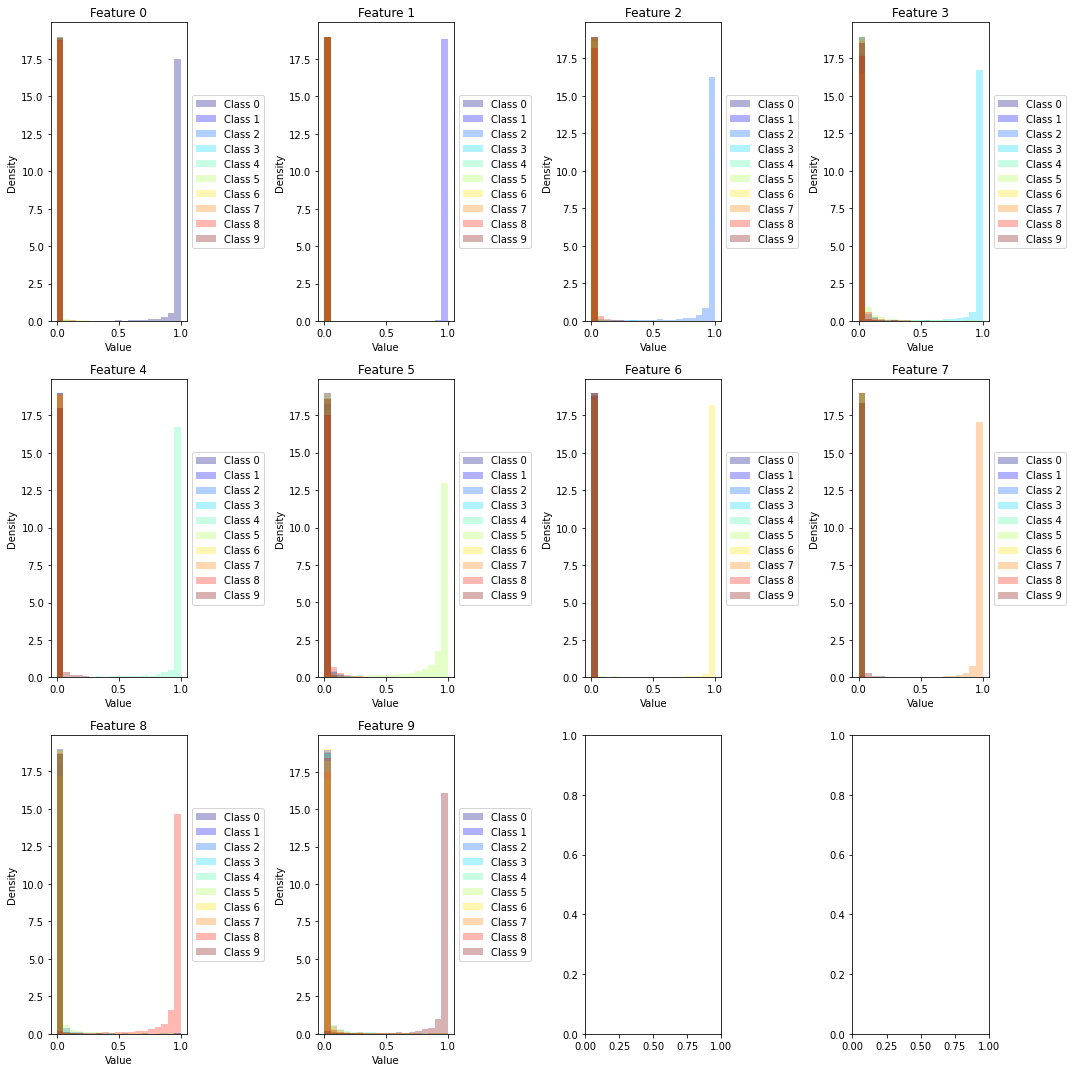

In [70]:
# Define the number of columns and rows for the grid
num_columns = 4  # You can adjust this based on your preference
num_rows = 3     # You may need to adjust this based on the number of columns

# Create a figure and an array of subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

output = loadmodels.predict(train_x)

for ifeature in range(0,10):
    feature = output[:,ifeature]
    row = ifeature // num_columns
    col = ifeature % num_columns
    print('row: %i, col: %i'%(row, col))
    
    m_max = np.max(feature)
    m_min = np.min(feature)
    
    bins = np.linspace(m_min, m_max, 20)
    
    for iclass in range(10):
        axs[row, col].hist(feature[train_y==iclass], bins=bins, 
                           fc=colors[iclass], density=True, alpha=0.3,
                           label='Class %i'%(iclass)
                          )

    axs[row, col].set_title(f'Feature {ifeature}')
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('Density')
    axs[row, col].legend(loc='center left',bbox_to_anchor=(1, 0.5))
    


# Show the plot
plt.tight_layout()